In [1]:
import sys
import io
import requests
import json
import base64
from PIL import Image
import numpy as np
import gradio as gr
import os
import pandas as pd
import h5py
from datetime import datetime
import re

from cambrian import Dataset


In [2]:
project_token = os.environ['PROJECT_TOKEN']
user_name = 'lawrance_chen'
ds = Dataset()
print(f'User name: {user_name}')
print(f'Project token: {project_token}')
data_token = 'f4b4d8a9171e75e1846962d7bf0b2675'

User name: lawrance_chen
Project token: bd96af150a897fb2c6468a19558508d5


Dataset Data:
                                 prompts/img/image_1  \
0  [[[255, 255, 221], [255, 255, 221], [255, 255,...   

                                 prompts/img/image_2  \
0  [[[95, 134, 185], [82, 125, 181], [89, 133, 18...   

                                 prompts/img/image_3  \
0  [[[122, 30, 105], [122, 30, 105], [122, 30, 10...   

                                 prompts/img/image_4  \
0  [[[91, 56, 34], [93, 67, 50], [86, 78, 67], [9...   

                                 prompts/mask/mask_1  \
0  [[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...   

                                 prompts/mask/mask_2  \
0  [[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...   

                                 prompts/mask/mask_3  \
0  [[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...   

                                 prompts/mask/mask_4  \
0  [[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...   

                   test_set/pred/pred_img/pred_img_1  \
0  [[[83, 174, 181], [81, 

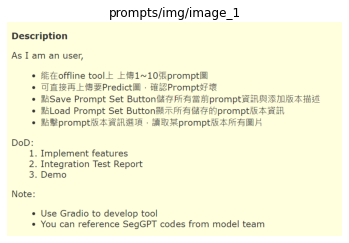

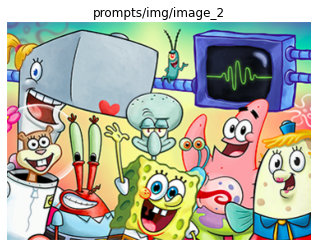

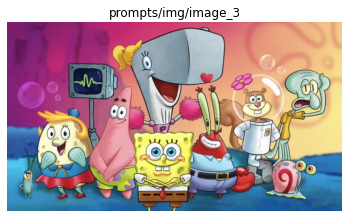

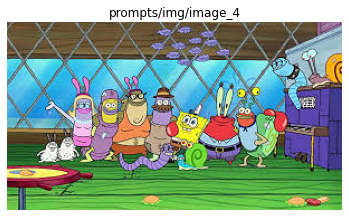

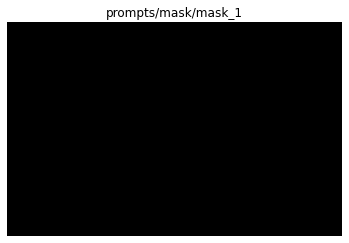

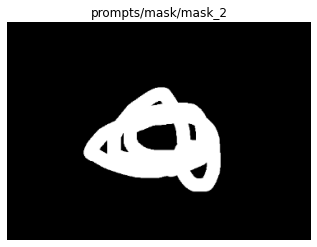

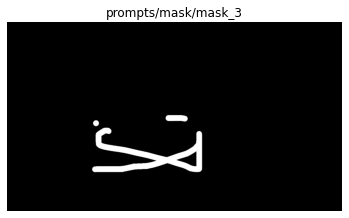

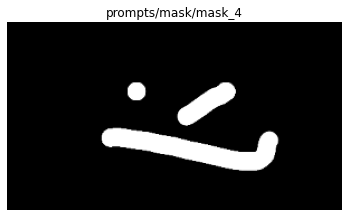

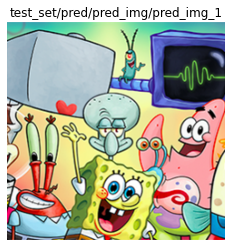

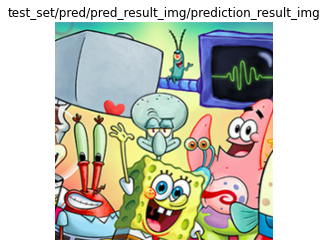

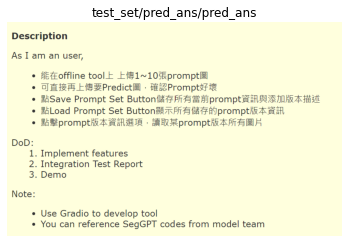

In [5]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def display_hdf5_file(file_path):
    try:
        # Open the HDF5 file
        with h5py.File(file_path, 'r') as hdf_file:
            # Initialize dictionaries to store data
            data_dict = {}

            # Function to check if the dataset contains an image
            def is_image_dataset(dataset):
                return len(dataset.shape) == 3 and dataset.shape[-1] in [1, 3]

            # Iterate through the groups and datasets in the file
            def extract_data(name, obj):
                if isinstance(obj, h5py.Dataset):
                    if is_image_dataset(obj):
                        # If the dataset contains an image, store it as an array
                        data_dict[name] = [obj[()]]
                    else:
                        # Otherwise, store the dataset as is
                        data_dict[name] = [obj[()]]

            hdf_file.visititems(extract_data)

            # Convert the dictionary to a pandas DataFrame
            df = pd.DataFrame(data_dict)

            # Display the DataFrame
            print(df)

            # Display images
            for column in df.columns:
                if isinstance(df[column][0], np.ndarray) and df[column][0].ndim == 3:
                    plt.figure()
                    plt.imshow(df[column][0])
                    plt.title(column)
                    plt.axis('off')
                    plt.show()

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    hdf5_file_path = "../testfileh5.h5"  # Replace with the name of your HDF5 file
    display_hdf5_file(hdf5_file_path)


Dataset Data:
                                 prompts/img/image_1  \
0  [[[95, 134, 185], [82, 125, 181], [89, 133, 18...   

                                 prompts/img/image_2  \
0  [[[122, 30, 105], [122, 30, 105], [122, 30, 10...   

                                 prompts/img/image_3  \
0  [[[91, 56, 34], [93, 67, 50], [86, 78, 67], [9...   

                                 prompts/img/image_4  \
0  [[[10, 41, 69], [10, 41, 69], [11, 42, 71], [1...   

                                 prompts/mask/mask_1  \
0  [[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...   

                                 prompts/mask/mask_2  \
0  [[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...   

                                 prompts/mask/mask_3  \
0  [[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...   

                                 prompts/mask/mask_4  \
0  [[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...   

                   test_set/pred/pred_img/pred_img_1  \
0  [[[255, 255, 221], [255

,prompts/img/image_1,prompts/img/image_2,prompts/img/image_3,prompts/img/image_4,prompts/mask/mask_1,prompts/mask/mask_2,prompts/mask/mask_3,prompts/mask/mask_4,test_set/pred/pred_img/pred_img_1,test_set/pred/pred_result_img/prediction_result_img,test_set/pred_ans/pred_ans
0,"[[[95, 134, 185], [82, 125, 181], [89, 133, 18...","[[[122, 30, 105], [122, 30, 105], [122, 30, 10...","[[[91, 56, 34], [93, 67, 50], [86, 78, 67], [9...","[[[10, 41, 69], [10, 41, 69], [11, 42, 71], [1...","[[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...","[[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...","[[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...","[[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...","[[[255, 255, 221], [255, 255, 221], [255, 255,...","[[[255, 255, 221], [255, 255, 221], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."



Attributes:
                       description performance
test_set/pred/pred_img        None        None


,description,performance
test_set/pred/pred_img,None,None


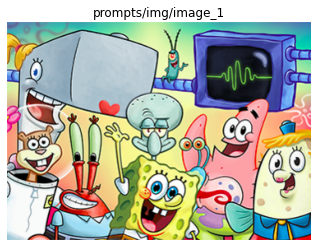

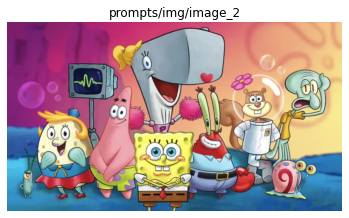

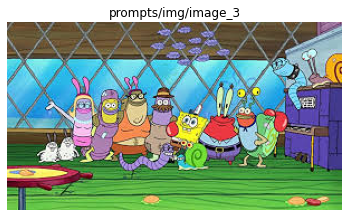

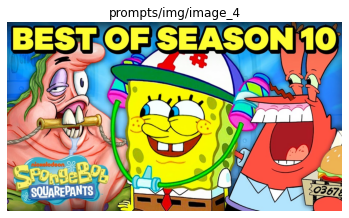

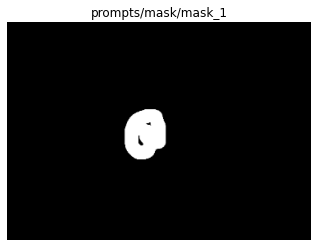

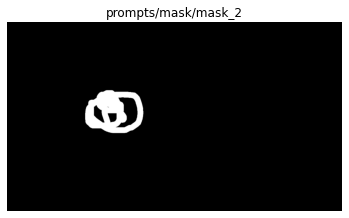

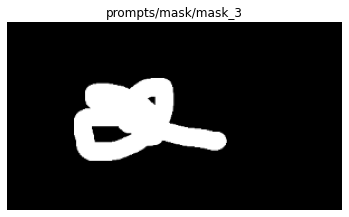

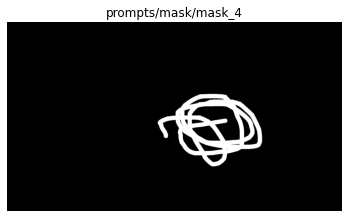

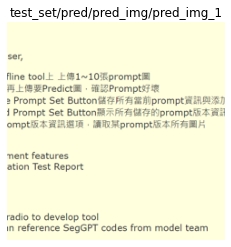

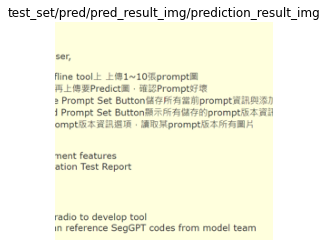

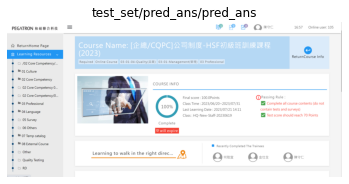

In [12]:
# Initialize dictionaries to store data and attributes
def display_hdf5_file(file_path):
    try:
        # Open the HDF5 file
        with h5py.File(file_path, 'r') as hdf_file:
            # Initialize dictionaries to store data            
            data_dict = {}
            attr_dict = {}

            # Function to check if the dataset contains an image
            def is_image_dataset(dataset):
                return len(dataset.shape) == 3 and dataset.shape[-1] in [1, 3]

            # Function to extract attributes
            def extract_attributes(name, obj):
                if isinstance(obj, h5py.AttributeManager):
                    attr_dict[name] = obj

            hdf_file.visititems(extract_attributes)

            # Function to convert attributes to strings
            def convert_attribute(attr):
                if isinstance(attr, h5py.Dataset):
                    return attr[()]
                elif isinstance(attr, h5py.AttributeManager):
                    return {key: val[()] for key, val in attr.items()}

            # Iterate through the groups and datasets in the file
            def extract_data(name, obj):
                if isinstance(obj, h5py.Dataset):
                    # If the dataset contains an image, store it as an array
                    data_dict[name] = [obj[()]]

                elif isinstance(obj, h5py.Group):
                    # Store the group attributes as a dictionary
                    attr_dict[name] = {key: convert_attribute(val) for key, val in obj.attrs.items()}

            hdf_file.visititems(extract_data)

            # Convert the dictionaries to pandas DataFrames
            df_data = pd.DataFrame(data_dict)
            df_attr = pd.DataFrame.from_dict(attr_dict, orient='index')

            # Display the DataFrame with datasets
            print("Dataset Data:")
            print(df_data)
            display(df_data)

            # Display the DataFrame with attributes
            print("\nAttributes:")
            print(df_attr)
            display(df_attr)

            # Display images
            for column in df_data.columns:
                if isinstance(df_data[column][0], np.ndarray) and df_data[column][0].ndim == 3:
                    plt.figure()
                    plt.imshow(df_data[column][0])
                    plt.title(column)
                    plt.axis('off')
                    plt.show()
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    hdf5_file_path = "../testfile2.h5"  # Replace with the name of your HDF5 file
    display_hdf5_file(hdf5_file_path)

In [ ]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
import numpy as np

def extract_data_from_hdf5(file_path):
    data_dict = {}
    attr_dict = {}

    def is_image_dataset(dataset):
        return len(dataset.shape) == 3 and dataset.shape[-1] in [1, 3]

    def extract_attributes(name, obj):
        if isinstance(obj, h5py.AttributeManager):
            attr_dict[name] = obj

    with h5py.File(file_path, 'r') as hdf_file:
        hdf_file.visititems(extract_attributes)

        def convert_attribute(attr):
            if isinstance(attr, h5py.Dataset):
                return attr[()]
            elif isinstance(attr, h5py.AttributeManager):
                return {key: val[()] for key, val in attr.items()}

        def extract_data(name, obj):
            if isinstance(obj, h5py.Dataset):
                if is_image_dataset(obj):
                    data_dict[name] = [obj[()]]
                else:
                    data_dict[name] = [obj[()]]
            elif isinstance(obj, h5py.Group):
                attr_dict[name] = {key: convert_attribute(val) for key, val in obj.attrs.items()}

        hdf_file.visititems(extract_data)

    df_data = pd.DataFrame(data_dict)
    df_attr = pd.DataFrame.from_dict(attr_dict, orient='index')

    return df_data, df_attr

def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    hdf5_file_path = "your_hdf5_file.hdf5"  # Replace with the name of your HDF5 file
    df_data, df_attr = extract_data_from_hdf5(hdf5_file_path)

    # Create Gradio interface
    iface = gr.Interface(
        fn=display_image,
        inputs="image",
        outputs=None,
        live=True,
        examples=[df_data["image"][0]]
    )

    # Launch the Gradio interface
    iface.launch()


In [4]:
../testfileh5
def save_prompt():
    # save prompt
    ret = ds.add(
                filename='dataset.h5', #your f5 filepath in local
                token=project_token,
                name='name ',
                visible="private",
                meta={
                    "general":{
                        "image_count": {
                            "train": 0,
                            "validate": 0,
                            "test": 0
                        },
                        "labeled_image_count": 0,
                        "unlabeled_image_count": 0,
                        "sample_count": { #same as image_count
                            "train": 0,
                            "validate": 0,
                            "test": 0
                        },
                        "labeled_sample_count": 0, #same as labeled_image_count
                        "unlabeled_sample_count": 0, #same as unlabeled_image_count
                        "description": "describe your dataset",
                        "project_token": project_token,
                        "dataset_type": [
                            "image"
                        ]
                    },
                    "image": {
                        "color_type": "Binary",
                        "image_dataset_format": "Binary",
                        "image_resolution": {
                            "224x224": 0 #your images size and count
                        }
                    },
                    "label": {
                        "label_type": [
                            "classification",
                            "seggpt" # custome label
                        ]
                    },
                    "misc": {
                        "creator": user_name, 
                        "job_id": 0,
                        "job_name": "",
                        "resize": "none"
                    }
                }
    )



SyntaxError: invalid syntax (2743574308.py, line 1)

In [ ]:
#gradio 
def package_images(image, output_file):
    # Create a new HDF5 file
    with h5py.File(output_file, 'w') as hf:
        hf.create_dataset('image1', data = image)



#Helper Function for packaging and downloading
def download_h5_file(prompt_name, image):
    # Package the images into an HDF5 file
    output_file = prompt_name + '.h5'
    package_images(image, output_file)
    return output_file
  
def get_path(output_file):
    return output_file.name

with gr.Blocks() as demo:
        with gr.Row():
            image1 = gr.Image(label = "image")
            prompt_name = gr.Textbox(label = "Prompt_name")
            save_button = gr.Button('Save Prompts')
            print_path = gr.Button('Print Path')

        with gr.Row():
            with gr.Column():
                output_file = gr.File(Label = "Download HDF5")
                path = gr.Textbox(label = "Textbox")
                
        save_button.click(download_h5_file, inputs= [prompt_name, image1], outputs = output_file)
        print_path.click(get_path, inputs= [output_file], outputs = path)

In [ ]:
demo.launch(enable_queue=True, server_name="0.0.0.0",server_port=6006)

In [ ]:
ds = Dataset()
filepath = 'file.h5'
ret = ds.get(dataset_token= '472eb876dcbacd5eeeb786b95e39b49c' , token= 'e25a11a32f16f9936fb5bb680ad0492d', version=None, filename=filepath)
print(ret)